In [1]:
import math
import numpy as np
import copy
from matplotlib import pyplot as plt

In [2]:
class SimulateAnneal:
    def __init__(self, target_func, interval = [0,10],min_temperature=1, max_temperature=100,
                 cooling_alpha=0.9, iter_round=1000, deciml_digits=4,inner_loop_round=100
                 ):
        self.target_func = target_func  # 要求姐最大值的目标函数
        self.x_interval = interval  # x取值区间
        
        self.temperature_pos = max_temperature  # 当前温度
        self.max_temperature = max_temperature  # 最大温度
        self.min_temperature = min_temperature  # 停止迭代时的最小温度

        self.research_step = math.pow(1,-deciml_digits)   # 产生新解时的搜索步长 
        self.cooling_alpha = cooling_alpha  # 降温系数
        self.iter_round = iter_round  # 最大迭代次数

        self.solution_local = np.random.randint(self.x_interval[0], high=self.x_interval[1])*\
                              np.random.rand()*self.research_step  # 随机初始化初始解

        self.iter_round_local = 0  # 当前迭代次数

        self.best_solution = copy.deepcopy(self.solution_local) # 最优解
        self.best_solution_func_val = self.target_func(self.best_solution)  # 最优解的函数值

        self.inner_loop_round = inner_loop_round  # 内循环次数

        self.best_solution_iter = []  # 记录最优解随迭代过程的变化
        self.best_solution_func_val_iter = []  # # 记录最优解的函数值随迭代过程的变化

    # 随机初始化初始解
    def __solution_init(self):
        self.solution_local = np.random.randint(self.x_interval[0], high=self.x_interval[1])*\
                              np.random.rand()*self.research_step

    # 迭代停止控制
    def stop_control(self):
        return self.iter_round_local >= self.iter_round or self.temperature_pos <= self.min_temperature

    # 随机在当前解周围产生新解
    def __generate_solution(self):
        new_solution = self.solution_local + \
               np.random.uniform(low=-self.research_step,high=self.research_step)*self.temperature_pos
        while True:
            if self.x_interval[0] < new_solution < self.x_interval[1]:
                break
            new_solution = self.solution_local + \
               np.random.uniform(low=-self.research_step,high=self.research_step)*self.temperature_pos
        return new_solution

    # 更新最优解，最优解对应的函数值
    def _update_best_solution(self, new_solution, new_solution_func_val):
        if new_solution_func_val > self.best_solution_func_val:
            self.best_solution = copy.deepcopy(new_solution)
            self.best_solution_func_val = self.target_func(self.best_solution)

    # 记录最优解、最优解的函数值随迭代过程的变化
    def iter_record(self):
        self.best_solution_iter.append(self.best_solution)
        self.best_solution_func_val_iter.append(self.best_solution_func_val)
        
    # 当前温度水平下的内部循环调整寻优过程
    def inner_loop(self):
        for _ in range(self.inner_loop_round):
            if self.stop_control():
                break
            # 在当前解的基础上左右随机搜索产生新解
            new_solution = self.__generate_solution()
            new_solution_func_val = self.target_func(new_solution)
            # 计算旧解的函数值
            local_solution_func_val = self.target_func(self.solution_local)
            dE =  local_solution_func_val - new_solution_func_val
            if dE <= 0:
                # 新解更优，接受新解
                self.solution_local = new_solution
                self._update_best_solution(new_solution, new_solution_func_val)
            else:
                # 新解比较差，一定给定概率接受新解
                rand_point = np.random.rand()
                if rand_point <= np.exp(-dE / self.temperature_pos):
                    self.solution_local = new_solution
            # 记录最优解、最优解的函数值随迭代过程的变化
            self.iter_record()
            # 迭代计数加一
            self.iter_round_local += 1

    # 绘制最优解和最优解的函数值随迭代而变化的过程
    def plot_iter(self, pic_save_dir):
        x = [iter_i for iter_i in range(1, len(self.best_solution_iter) + 1)]
        y_list = [self.best_solution_iter, self.best_solution_func_val_iter]
        y_lable_list = ['best_solution','best_solution_func_val']
        for y_index in range(len(y_list)):
            plt.plot(x, y_list[y_index], label=y_lable_list[y_index])
            plt.xlabel(r'iter_round')
            plt.ylabel(y_lable_list[y_index])
            plt.savefig(pic_save_dir + r'\\SimulatedAnneal_'+ y_lable_list[y_index]+'.png')
            plt.show()

    # 函数主程
    def simulate_anneal_tsp_engine(self, pic_save_dir):
        while not self.stop_control():
            # 内循环
            self.inner_loop()
            # 一次降温
            self.temperature_pos = self.temperature_pos * self.cooling_alpha
        print('Simulated Anneal:')
        print('best solution of x:', self.best_solution)
        print('best function val of x:', self.best_solution_func_val)
        return self.plot_iter(pic_save_dir)


In [3]:
target_func = lambda x: -(x+2)*(x+1)*(x-3)*(x-4)
pic_save_dir = r'D:\WORK__wells\Other Program\Function Solution'

In [4]:
test_simuanneal = SimulateAnneal(target_func, interval = [0,10],min_temperature=25, max_temperature=100,
                                 cooling_alpha=0.9, iter_round=500, deciml_digits=3,inner_loop_round=100)

Simulated Anneal:
best solution of x: 3.5485649144798694
best function val of x: 6.249976797699028


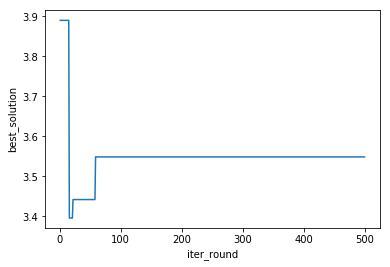

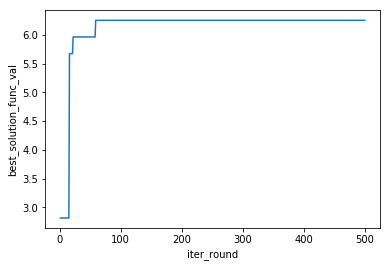

In [5]:
test_simuanneal.simulate_anneal_tsp_engine(pic_save_dir)